## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

## Loading data

In [2]:
df = pd.read_csv("./datasets/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [8]:
df.drop(columns=['loan_id'], inplace=True)

In [9]:

df.columns = df.columns.str.strip()
loan_status = pd.get_dummies(df['loan_status'], drop_first=True)
df.drop(columns=['loan_status'], inplace=True)
df = pd.concat([df, loan_status], axis=1)
education = pd.get_dummies(df['education'], drop_first=True)
df.drop(columns=['education'], inplace=True)
df = pd.concat([df, education], axis=1)
self_employed = pd.get_dummies(df['self_employed'], drop_first=True)
df.drop(columns=['self_employed'], inplace=True)
df = pd.concat([df, self_employed], axis=1)
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,Rejected,Not Graduate,Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True,True


## EDA

<Axes: >

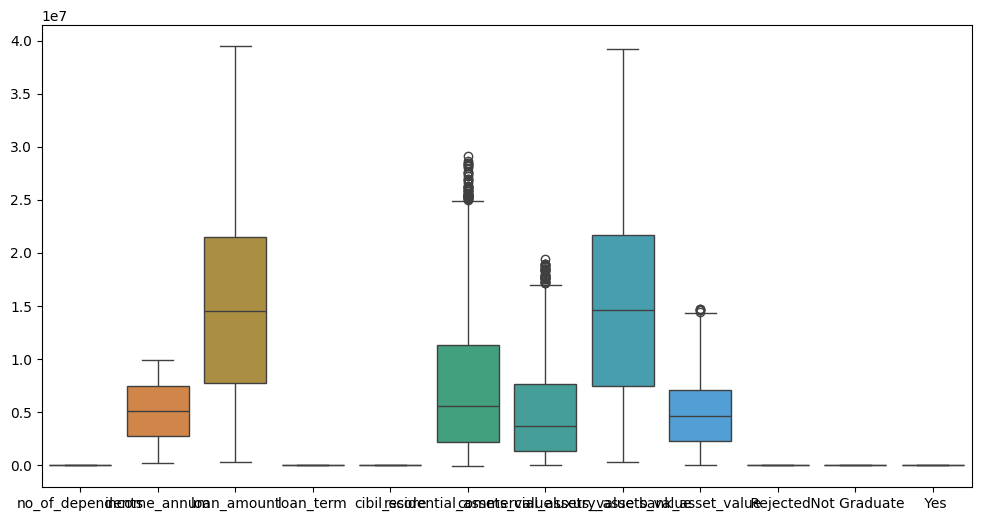

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)

<Axes: >

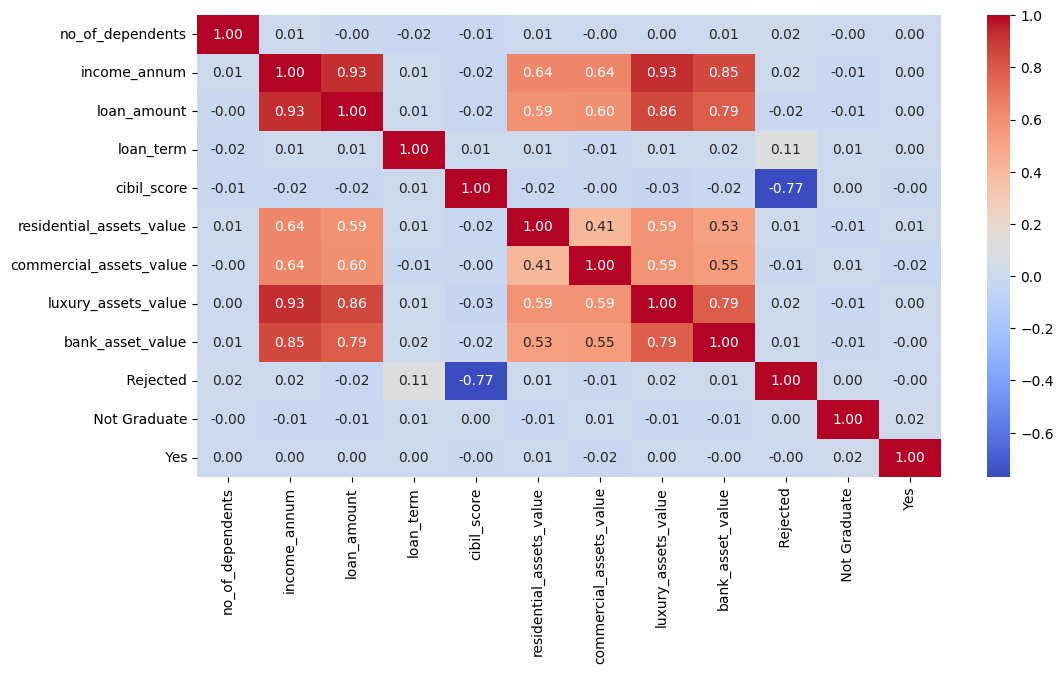

In [11]:
cor = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='income_annum', ylabel='loan_amount'>

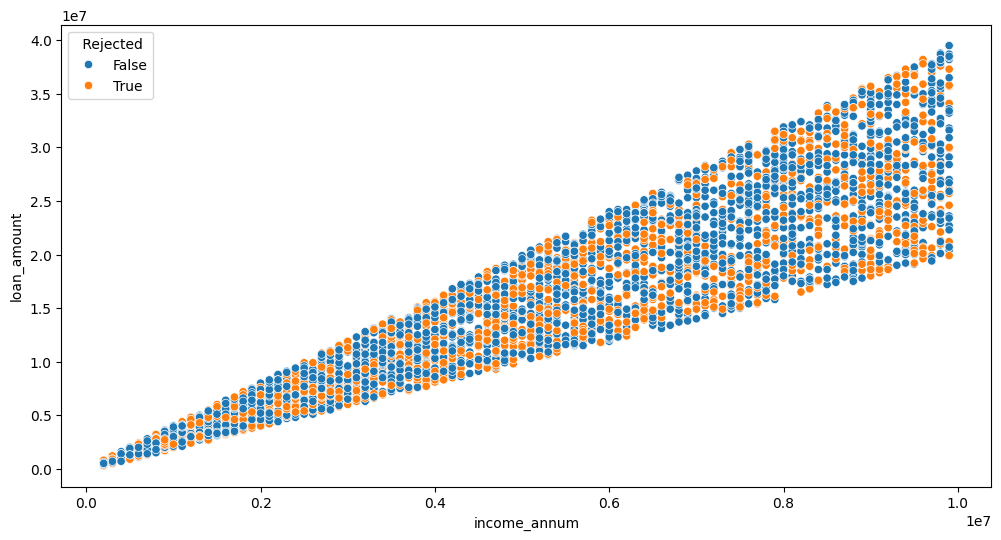

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='income_annum', y='loan_amount', hue=' Rejected', data=df)

<Axes: xlabel='cibil_score', ylabel='loan_amount'>

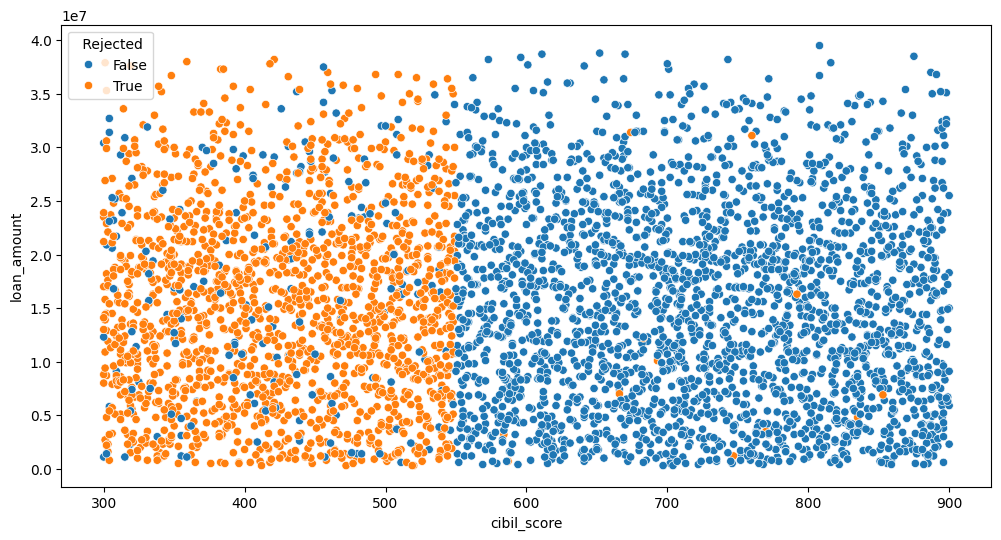

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='cibil_score', y='loan_amount', hue=' Rejected', data=df)

<Axes: xlabel='cibil_score', ylabel='bank_asset_value'>

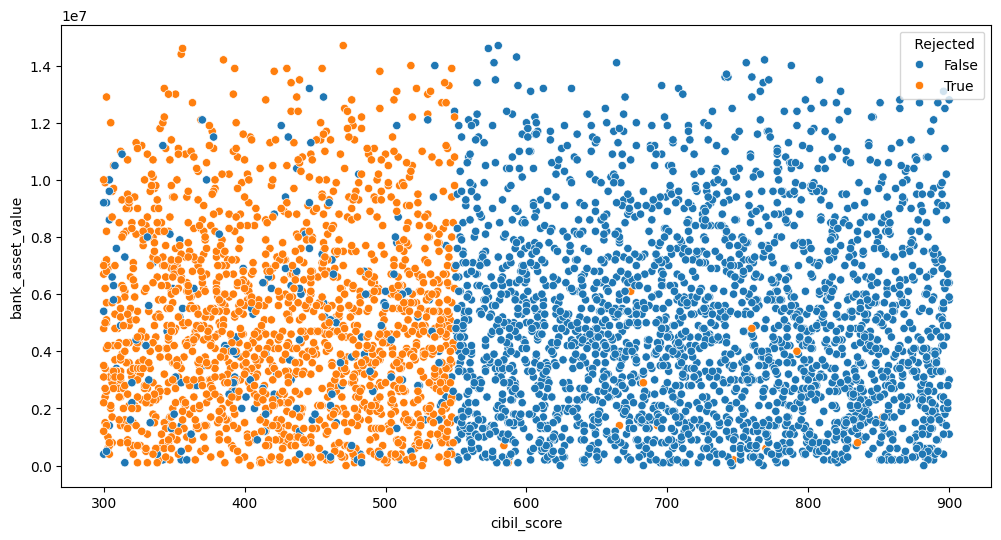

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(y='bank_asset_value', x='cibil_score', hue=' Rejected', data=df)

<Axes: xlabel='no_of_dependents', ylabel='loan_amount'>

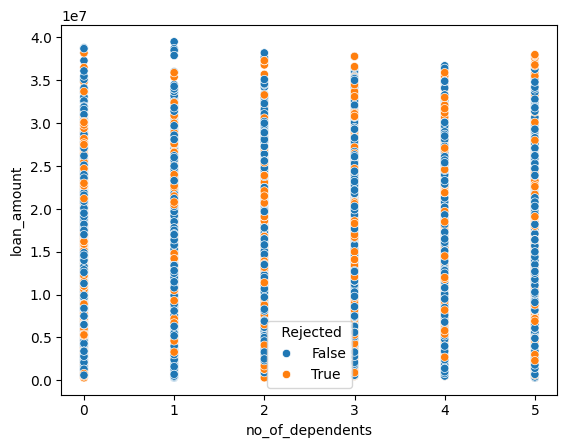

In [15]:
sns.scatterplot(x='no_of_dependents', y='loan_amount', hue=' Rejected', data=df)

<Axes: xlabel='loan_term', ylabel='loan_amount'>

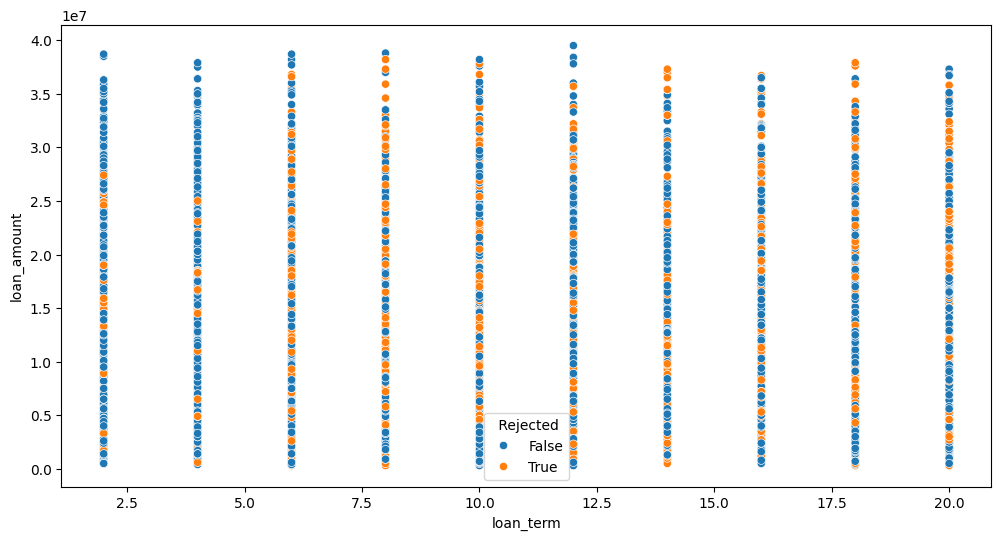

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='loan_term', y='loan_amount', hue=' Rejected', data=df)

<Axes: xlabel=' Rejected', ylabel='count'>

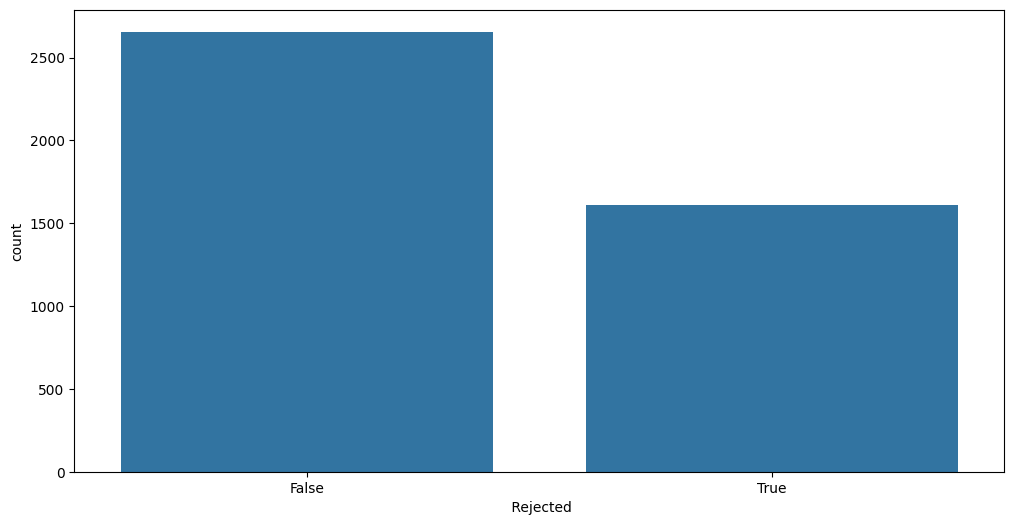

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x=' Rejected', data=df)

In [18]:
df.drop(columns=['luxury_assets_value', 'commercial_assets_value', 'loan_amount'], inplace=True, axis=1)
df.head()

,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,bank_asset_value,Rejected,Not Graduate,Yes
0,2,9600000,12,778,2400000,8000000,False,False,False
1,0,4100000,8,417,2700000,3300000,True,True,True
2,3,9100000,20,506,7100000,12800000,True,False,False
3,3,8200000,8,467,18200000,7900000,True,False,False
4,5,9800000,20,382,12400000,5000000,True,True,True


## modelling

In [19]:
X = df.drop(columns=[' Rejected'], axis=1)
y = df[' Rejected']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2 ,random_state=42)
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")

recall_s = recall_score(y_test, y_predict, average="weighted")
print(f"Recall score: {recall_s}")

precision_s = precision_score(y_test, y_predict, average="weighted")
print(f"Precision score: {precision_s}")

Accuracy: 0.8021077283372365
Recall score: 0.8021077283372365
Precision score: 0.8033418949614816


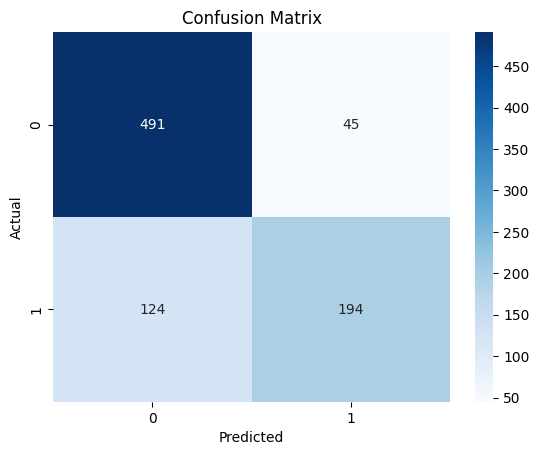

In [21]:
conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hyperparameter tuning

Best parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


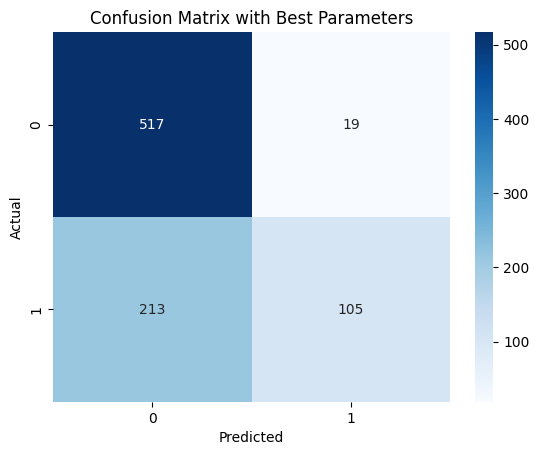

In [22]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
model_best = LogisticRegression(**best_params)
model_best.fit(X_train, y_train)
y_predict_best = model_best.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_predict_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Best Parameters')
plt.show()

In [23]:
# print accuracy, recall score and precision score for the best model
accuracy_best = accuracy_score(y_test, y_predict_best)
print(f"Accuracy with best parameters: {accuracy_best}")

precision_best = precision_score(y_test, y_predict_best, average="weighted")
print(f"Precision score with best parameters: {precision_best}")

recall_best = recall_score(y_test, y_predict_best, average="weighted")
print(f"Recall score with best parameters: {recall_best}")

Accuracy with best parameters: 0.7283372365339579
Precision score with best parameters: 0.7598122634665596
Recall score with best parameters: 0.7283372365339579
